In [3]:
import matplotlib.pyplot as plt
!pip install yfinance
import yfinance as yf
import pandas as pd
df=yf.Ticker("TCS.NS")

df=df.history(period="max")
df.reset_index(inplace=True)
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')
# print(df['Date'])
df.drop(['Dividends','Stock Splits',"Date"], inplace=True, axis=1)
print(df)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 KB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 10.5 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [4]:
ma100=df.Close.rolling(100).mean()
ma100

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
5069    3218.590225
5070    3216.778030
5071    3216.138108
5072    3215.078901
5073    3214.640684
Name: Close, Length: 5074, dtype: float64

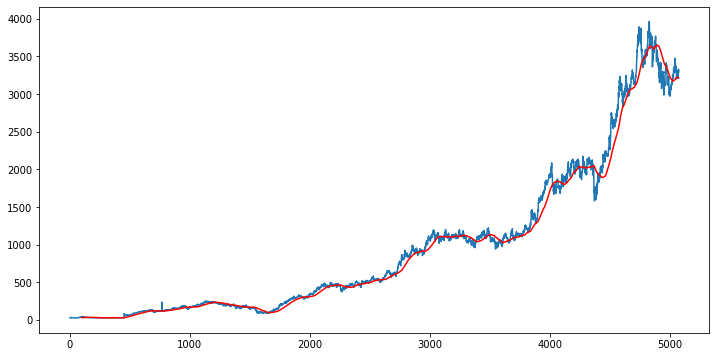

In [5]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,"r")

In [6]:
ma200=df.Close.rolling(200).mean()
ma200


0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
5069    3291.673311
5070    3289.812684
5071    3288.127213
5072    3286.217421
5073    3284.334099
Name: Close, Length: 5074, dtype: float64

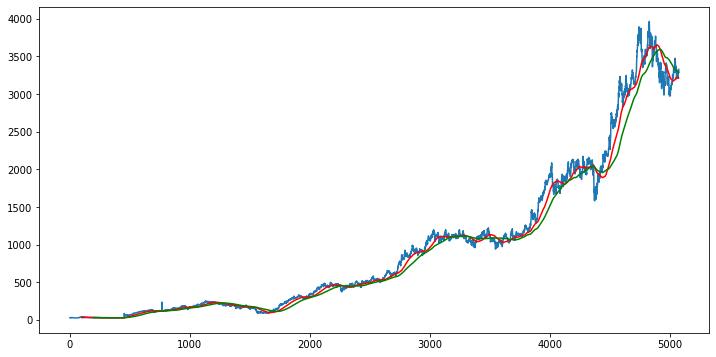

In [7]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,"r")
plt.plot(ma200,"g")

In [8]:
#splitting data into training and testing

data_training= pd.DataFrame(df["Close"][0:int(len(df)*0.70)])
data_testing= pd.DataFrame(df["Close"][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(3551, 1)
(1523, 1)


In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [10]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[2.58333948e-03],
       [2.25470112e-03],
       [6.03798600e-04],
       ...,
       [7.71870684e-01],
       [7.97421241e-01],
       [7.77818837e-01]])

In [11]:
x_train =[]
y_train = []

for i in range(100,data_training_array.shape[0]):
  x_train.append(data_training_array[i-100:i])
  y_train.append(data_training_array[i,0])

import numpy as np
x_train, y_train = np.array(x_train),np.array(y_train)


In [12]:
# ML model

In [13]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential


In [14]:
model = Sequential()
model.add(LSTM(units = 50, activation = "relu", return_sequences= True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = "relu", return_sequences= True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = "relu", return_sequences= True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = "relu"))
model.add(Dropout(0.5))

model.add(Dense(units=1))



In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [16]:
model.compile(optimizer="adam", loss = 'mean_squared_error')
model.fit(x_train,y_train,epochs= 50)

Epoch 1/50
108/108 [==============================] - 42s 315ms/step - loss: 0.0273
Epoch 2/50
108/108 [==============================] - 34s 316ms/step - loss: 0.0075
Epoch 3/50
108/108 [==============================] - 34s 316ms/step - loss: 0.0063
Epoch 4/50
108/108 [==============================] - 34s 316ms/step - loss: 0.0053
Epoch 5/50
108/108 [==============================] - 34s 316ms/step - loss: 0.0052
Epoch 6/50
108/108 [==============================] - 34s 317ms/step - loss: 0.0049
Epoch 7/50
108/108 [==============================] - 34s 317ms/step - loss: 0.0051
Epoch 8/50
108/108 [==============================] - 34s 317ms/step - loss: 0.0046
Epoch 9/50
108/108 [==============================] - 37s 344ms/step - loss: 0.0047
Epoch 10/50
108/108 [==============================] - 34s 316ms/step - loss: 0.0050
Epoch 11/50
108/108 [==============================] - 34s 315ms/step - loss: 0.0045
Epoch 12/50
108/108 [==============================] - 34s 317ms/step - lo

In [17]:
model.save("keras_model.h5")

In [18]:
from google.colab import files
files.download("keras_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [19]:
data_testing.head()

,Close
3551,951.782043
3552,955.275452
3553,956.216064
3554,965.778381
3555,980.154785


In [20]:
data_training.tail(100)

,Close
3451,1181.171143
3452,1188.500000
3453,1178.564819
3454,1146.754639
3455,1111.959351
...,...
3546,965.374878
3547,941.055237
3548,950.079895
3549,980.669922


In [21]:
past_100_days = data_training.tail(100)

In [22]:
final_df = past_100_days.append(data_testing, ignore_index=True)

In [23]:
final_df.head()

,Close
0,1181.171143
1,1188.500000
2,1178.564819
3,1146.754639
4,1111.959351


In [24]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.07941792],
       [0.08184193],
       [0.07855588],
       ...,
       [0.7868153 ],
       [0.77571868],
       [0.78970935]])

In [25]:
input_data.shape

(1623, 1)

In [26]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
  x_test.append(input_data[i-100:i])
  y_test.append(input_data[i,0])
  

In [27]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)


(1523, 100, 1)
(1523,)


In [28]:
# Making predictions

y_predicted = model.predict(x_test)

48/48 [==============================] - 5s 92ms/step


In [29]:
y_predicted.shape

(1523, 1)

In [30]:
y_test


array([0.00354787, 0.00470331, 0.00501442, ..., 0.7868153 , 0.77571868,
       0.78970935])

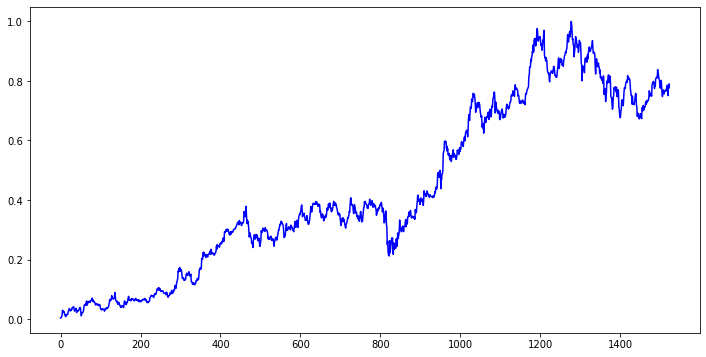

In [31]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label="Original Price")

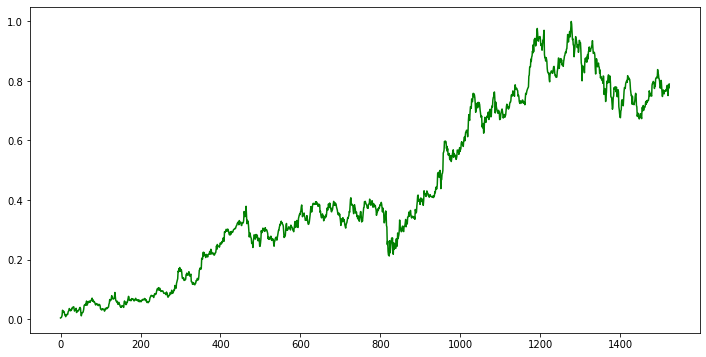

In [32]:
y_predicted
plt.figure(figsize=(12,6))
plt.plot(y_test,'g',label="Predicted Price")

In [33]:
scaler.scale_

array([0.00033075])

In [34]:
scale_factor= 1/0.0033075
y_predicted = y_predicted* scale_factor
y_test = y_test * scale_factor

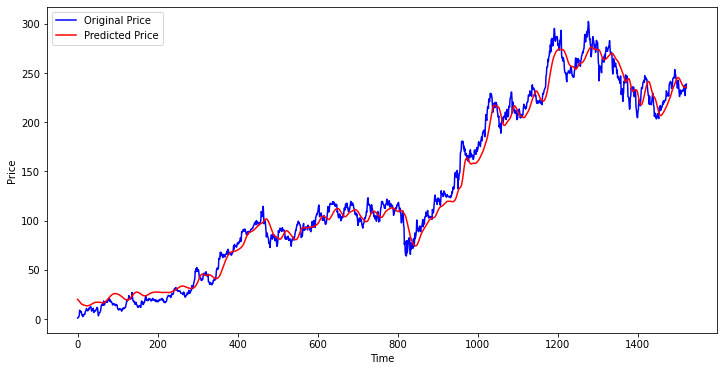

In [35]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label="Original Price")
plt.plot(y_predicted,"r",label="Predicted Price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

In [1]:
# plt.figure(figsize=(12,6))
# plt.plot(df.Close,'b',label="Original Price")